Combine pymatgen.io.lammps and pymatgen-diffusion(https://github.com/materialsvirtuallab/pymatgen-diffusion) packages to parse lammps output files and plot the radial distribution function.

In [1]:
from pymatgen.io.lammps.output import LammpsRun
from pymatgen_diffusion.aimd.van_hove import RadialDistributionFunction

%matplotlib inline

In [2]:
lammpsrun = LammpsRun("test_files/nvt.data", 
                      "test_files/nvt.dump", 
                      "test_files/nvt.log",
                      is_forcefield=True)

In [3]:
diffusion_analyzer = lammpsrun.get_diffusion_analyzer("O", 300, 1, 1)

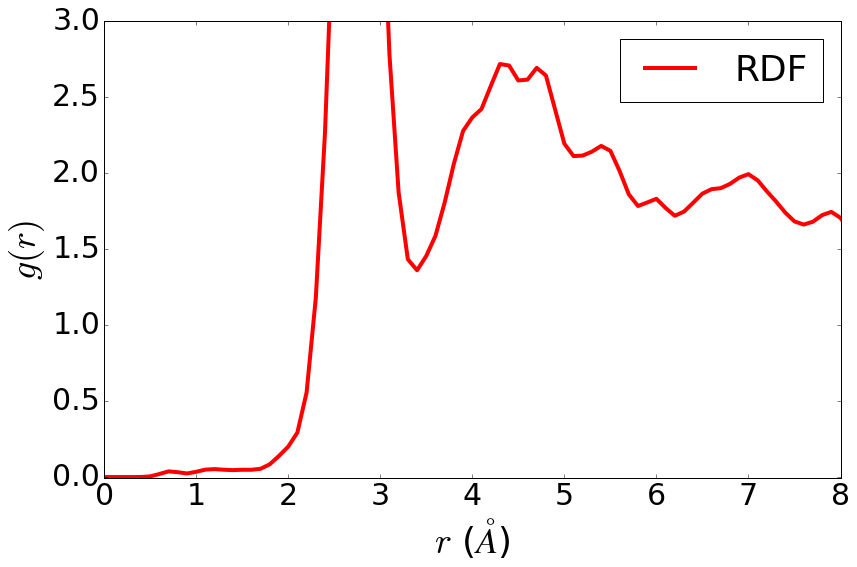

In [4]:
structure_list = [s for s in diffusion_analyzer.get_drift_corrected_structures()]

# Compute and plot RDF for O    
species = ["O"]
obj = RadialDistributionFunction(structure_list, ngrid=101, rmax=10.0, cellrange=1, sigma=0.1, species = species)
plt = obj.get_rdf_plot(label="RDF")